In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import pandas as pd

%matplotlib inline

In [2]:
def array2dataframe(loss_array, log_grad_var_array, estimator, every_n=500):
    nseeds, nsteps = loss_array.shape
    data_for_pd = []
    if estimator == "relax":
        estimator_name = "PL-RELAX"
    elif estimator == "rebar":
        estimator_name = "PL-REBAR"
    elif estimator == "reinforce":
        estimator_name = "REINFORCE"
    else:
        estimator_name = "EXACT"
    for i in range(nseeds):
        for j in range(nsteps):
            data_for_pd.append(
                [j * every_n, loss_array[i, j], log_grad_var_array[i, j], estimator_name]
            )
    dataframe = pd.DataFrame(data=data_for_pd, columns=["Steps", "Loss", "LogGradVar", "Estimator"])
    return dataframe

In [3]:
def load_statistics(estimator):
    log_grad_vars = []
    mean_obj = []
    with open("./exp_log/history_{0}.pkl".format(estimator), "rb") as file:
        history = pickle.load(file)
    if estimator == "exact":
        log_grad_vars.append(history["grad_std"].mean(-1))
    else:
        log_grad_vars.append(2*np.log(history["grad_std"].mean(-1)))
    mean_obj.append(history["mean_objective"])
    log_grad_vars = np.array(log_grad_vars)
    mean_obj = np.array(mean_obj)
    return array2dataframe(mean_obj, log_grad_vars, estimator)

In [4]:
statistics_dataframe = pd.concat([
    load_statistics("relax"),
    load_statistics("rebar"),
    load_statistics("reinforce"),
    load_statistics("exact")
], ignore_index=True)

In [5]:
from IPython.core.pylabtools import figsize
figsize(14, 5)
plt.rcParams.update(
    {
        'font.size': "22",
        'font.family': ["Times New Roman"],
    }
)

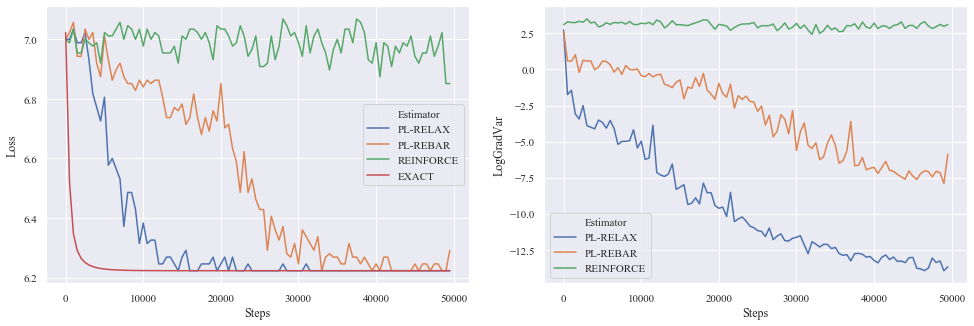

In [6]:
plt.subplot(1, 2, 1)
sns.lineplot(x="Steps", y="Loss", hue="Estimator", data=statistics_dataframe)
plt.subplot(1, 2, 2)
sns.lineplot(
    x="Steps", y="LogGradVar", hue="Estimator",
    hue_order=["PL-RELAX", "PL-REBAR", "REINFORCE"], data=statistics_dataframe
)
plt.tight_layout();
plt.savefig("./figures/toy_together.png", bbox_inches='tight', dpi=300);